In [1]:
%cd ./vis

c:\Users\agata\Desktop\UNI\MSC\BIAM\Framsticks\framspy\frams-gecco-2024\vis


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

import interpret
import pandas as pd


In [41]:
results_list = []
PROP = ["04", "05", "06", "07"]

for proportion in PROP:

    groupped_results = interpret.import_from_dir(f"../results/dpga_{proportion}/", lambda args: args["meta"] + " - F" + args["genformat"])
    results_df = interpret.convert_to_dataframe(groupped_results)
    results_df["format"] = results_df["group"].apply(lambda x: x.split(" - ")[1])
    results_df["group"] = results_df["group"].str[:4] + "_" + proportion
    results_list.append(results_df)

groupped_results = interpret.import_from_dir(f"../results/simple/", lambda args: args["meta"] + " - F" + args["genformat"])
results_df = interpret.convert_to_dataframe(groupped_results)
results_df["format"] = results_df["group"].apply(lambda x: x.split(" - ")[1])
results_df["group"] = results_df["group"].str[:6] 
results_list.append(results_df)

results_df = pd.concat(results_list)
results_df.head()

,group,run_idx,gen,nevals,avg,stddev,min,max,m_strength,time_s,format
0,DPGA_04,0,0,30,0.000000,0.000000,0.0,0.000000,1.0,3440.245399,F0
1,DPGA_04,0,1,24,0.000007,0.000040,0.0,0.000225,1.0,3440.245399,F0
2,DPGA_04,0,2,23,0.000023,0.000067,0.0,0.000225,1.0,3440.245399,F0
3,DPGA_04,0,3,25,0.000040,0.000081,0.0,0.000225,1.0,3440.245399,F0
4,DPGA_04,0,4,26,0.000126,0.000100,0.0,0.000225,1.0,3440.245399,F0


In [43]:
proportions = [f"DPGA_{str(s)}" for s in PROP] + ["SIMPLE"]
cols = sns.color_palette("YlOrRd")

custom_colors = dict(zip(proportions, cols))

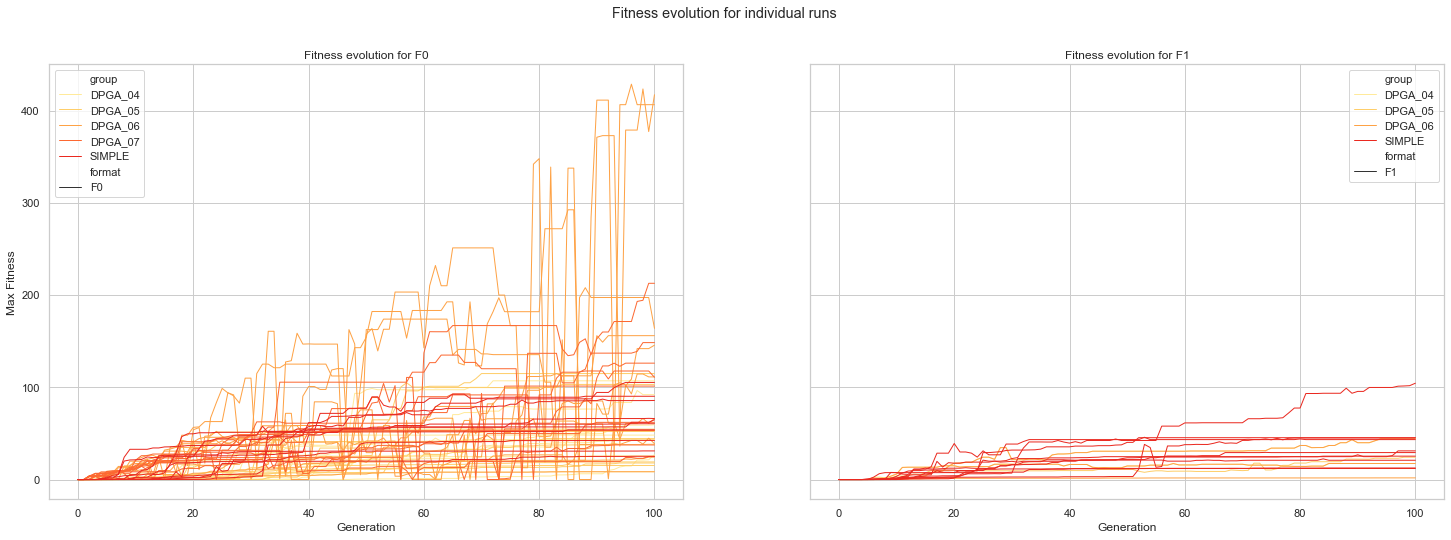

In [44]:
fig, axs = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)

sns.lineplot(x="gen", y="max", hue="group", style="format",  data=results_df[results_df.format == "F0"], units="run_idx", estimator=None, lw=1, palette=custom_colors, ax=axs[0])
sns.lineplot(x="gen", y="max", hue="group", style="format",  data=results_df[results_df.format == "F1"], units="run_idx", estimator=None, lw=1, palette=custom_colors, ax=axs[1])
axs[0].set_title("Fitness evolution for F0")
axs[1].set_title("Fitness evolution for F1")
axs[0].set_ylabel("Max Fitness")
axs[0].set_xlabel("Generation")
axs[1].set_xlabel("Generation")

plt.suptitle("Fitness evolution for individual runs")
plt.show()

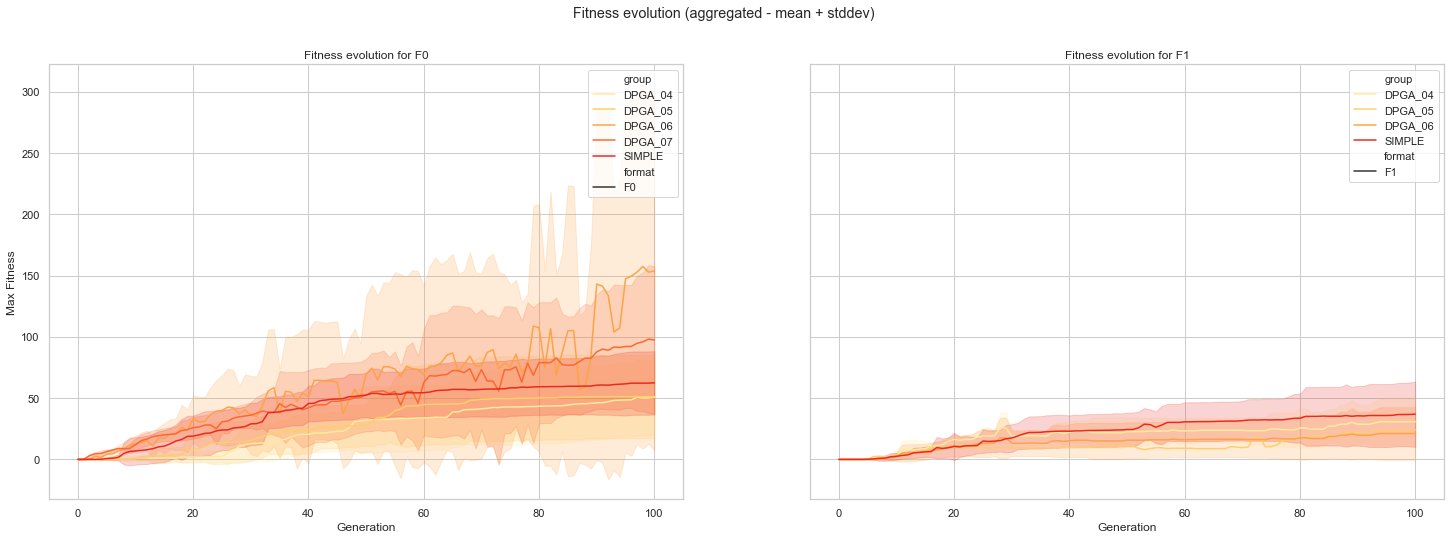

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(25, 8), sharey=True, sharex=True)

sns.lineplot(x="gen", y="max", hue="group", style="format",  data=results_df[results_df.format == "F0"], errorbar="sd", palette=custom_colors, ax=axs[0])
sns.lineplot(x="gen", y="max", hue="group", style="format",  data=results_df[results_df.format == "F1"], errorbar="sd", palette=custom_colors, ax=axs[1])
axs[0].set_title("Fitness evolution for F0")
axs[1].set_title("Fitness evolution for F1")
axs[0].set_ylabel("Max Fitness")
axs[0].set_xlabel("Generation")
axs[1].set_xlabel("Generation")

plt.suptitle("Fitness evolution (aggregated - mean + stddev)")
plt.show()

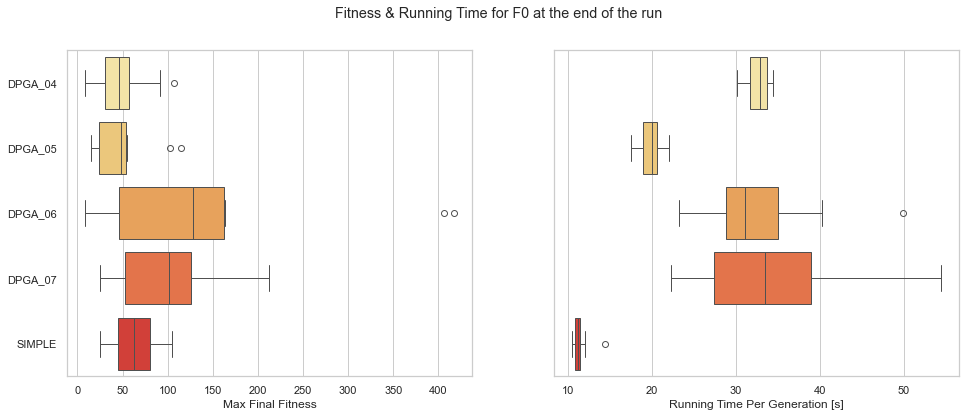

In [46]:
end_results = results_df[(results_df["gen"] == results_df["gen"].max()) & (results_df["format"] == "F0")].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(y="group", x="max", data=end_results, palette=custom_colors, hue="group", ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_xlabel("Max Final Fitness")
sns.boxplot(y="group", x="gen_time_s", data=end_results, palette=custom_colors, hue="group", ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_xlabel("Running Time Per Generation [s]")
plt.suptitle("Fitness & Running Time for F0 at the end of the run")
plt.show()

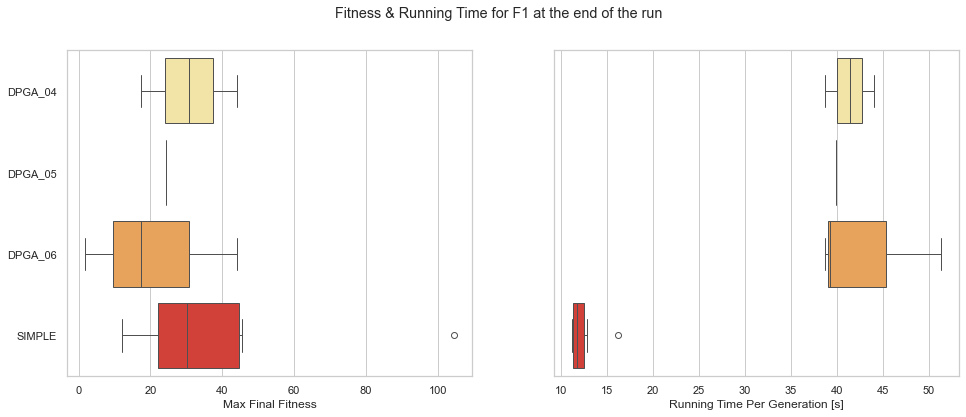

In [47]:
end_results = results_df[(results_df["gen"] == results_df["gen"].max()) & (results_df["format"] == "F1")].copy()
end_results["gen_time_s"] = end_results["time_s"] / end_results["gen"].max()
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
sns.boxplot(y="group", x="max", data=end_results, palette=custom_colors, hue="group", ax=axs[0])
axs[0].set_ylabel("")
axs[0].set_xlabel("Max Final Fitness")
sns.boxplot(y="group", x="gen_time_s", data=end_results, palette=custom_colors, hue="group", ax=axs[1])
axs[1].set_ylabel("")
axs[1].set_xlabel("Running Time Per Generation [s]")
plt.suptitle("Fitness & Running Time for F1 at the end of the run")
plt.show()